In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cancer_Data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

B    357
M    212
Name: diagnosis, dtype: int64


In [6]:
print('Train columns with null values:\n', df.isnull().sum())


Train columns with null values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

In [7]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [8]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [11]:
df['diagnosis'].replace(['B','M'], [0,1], inplace= True)

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

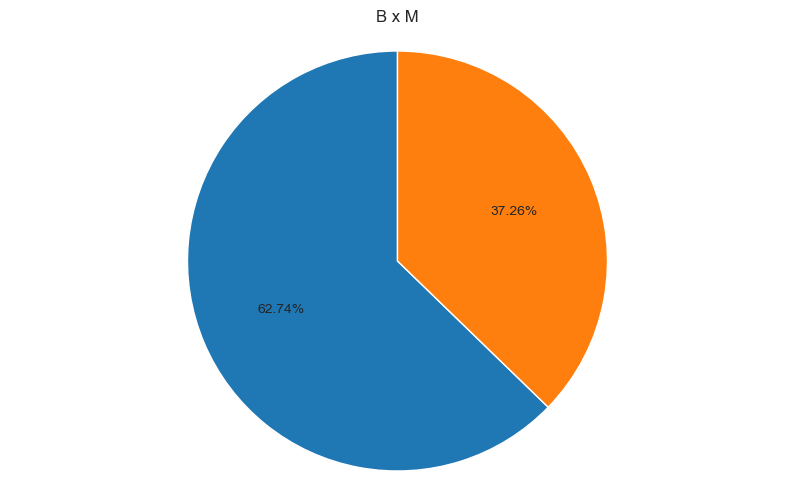

In [14]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%',startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()


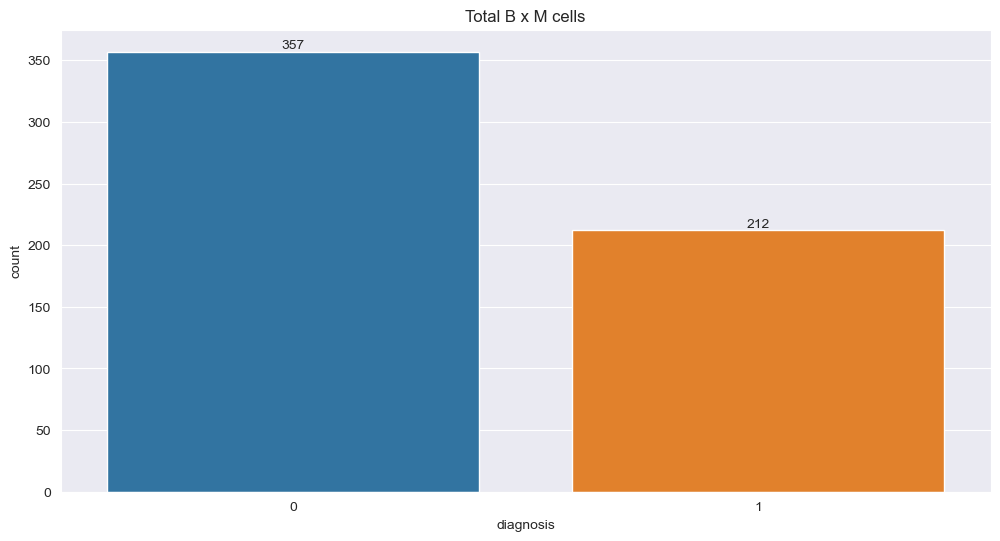

In [15]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='diagnosis')
plt.title('Total B x M cells')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

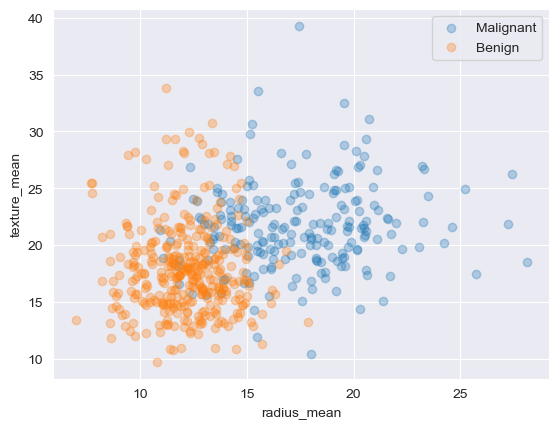

In [16]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]
plt.scatter(M.radius_mean,M.texture_mean, label = "Malignant", alpha = .3)
plt.scatter(B.radius_mean,B.texture_mean, label = "Benign", alpha = .3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [17]:
df.groupby('diagnosis')[['radius_mean','texture_mean']].mean()

,radius_mean,texture_mean
diagnosis,,
0,12.146524,17.914762
1,17.462830,21.604906


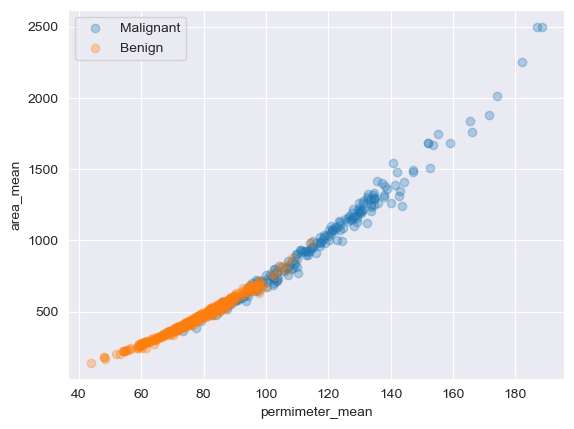

In [18]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]
plt.scatter(M.perimeter_mean,M.area_mean, label = "Malignant", alpha = .3)
plt.scatter(B.perimeter_mean,B.area_mean, label = "Benign", alpha = .3)
plt.xlabel("permimeter_mean")
plt.ylabel("area_mean")
plt.legend()
plt.show()

In [19]:
df.groupby('diagnosis')[['perimeter_mean','area_mean']].mean()

,perimeter_mean,area_mean
diagnosis,,
0,78.075406,462.790196
1,115.365377,978.376415


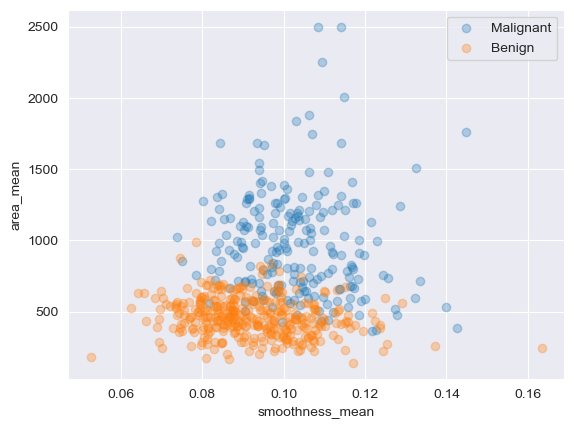

In [20]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]
plt.scatter(M.smoothness_mean,M.area_mean, label = "Malignant", alpha = .3)
plt.scatter(B.smoothness_mean,B.area_mean, label = "Benign", alpha = .3)
plt.xlabel("smoothness_mean")
plt.ylabel("area_mean")
plt.legend()
plt.show()

In [21]:
df.groupby('diagnosis')[['smoothness_mean','area_mean']].mean()

,smoothness_mean,area_mean
diagnosis,,
0,0.092478,462.790196
1,0.102898,978.376415


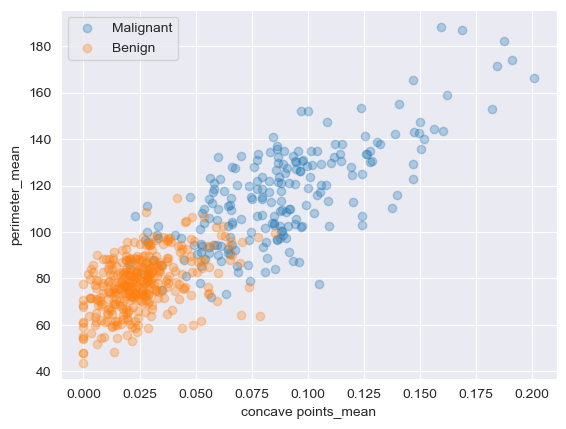

In [22]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]
plt.scatter(M['concave points_mean'],M.perimeter_mean, label = "Malignant", alpha = .3)
plt.scatter(B['concave points_mean'],B.perimeter_mean, label = "Benign", alpha = .3)
plt.xlabel("concave points_mean")
plt.ylabel("perimeter_mean")
plt.legend()
plt.show()

In [23]:
df.groupby('diagnosis')[['concave points_mean','perimeter_mean']].mean()

,concave points_mean,perimeter_mean
diagnosis,,
0,0.025717,78.075406
1,0.087990,115.365377


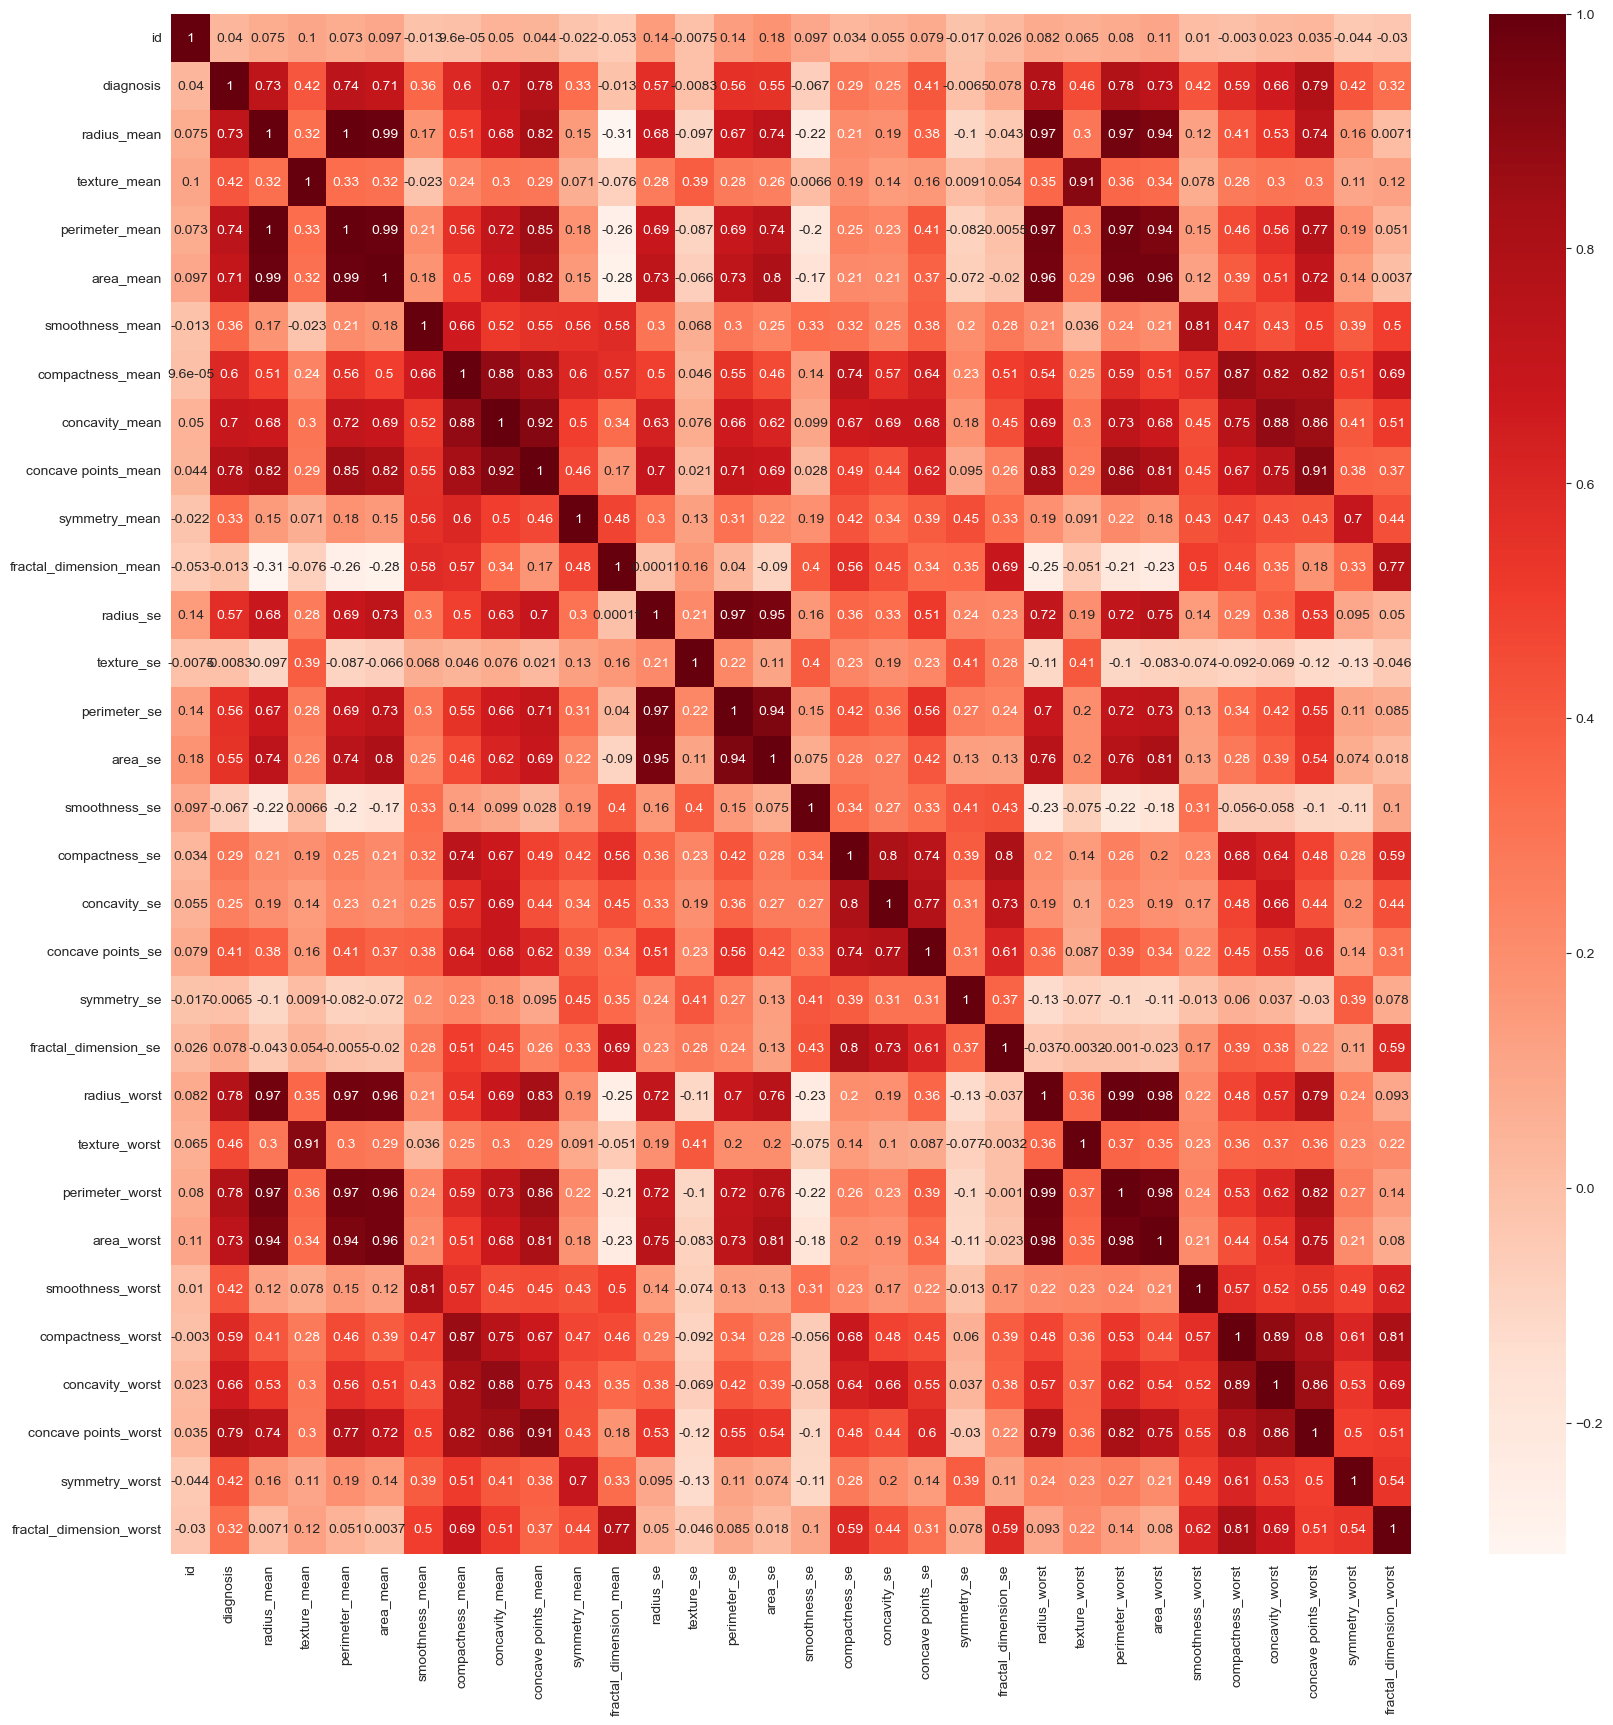

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Reds')
plt.show()

In [25]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [26]:
import sklearn
print(sklearn.__version__)



1.3.0


In [27]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import expon, uniform

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df.shape

In [ ]:
df = df.drop(labels="id", axis=1)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33, random_state=43,stratify=y)

In [ ]:
model_dict={}

In [ ]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print(accuracy_xgb)

In [ ]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')

param_dist = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'reg_alpha': [0, 0.01, 1],
    'reg_lambda': [0, 0.01, 1]
}

random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, 
                                   n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

best_classifier = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy (CV):", best_score)
print("Accuracy on Validation Set:", accuracy_xgb)

In [ ]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')

param_dist = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1],
    'gamma': [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, 
                                   n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

best_classifier = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

y_pred = best_classifier.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy (CV):", best_score)
print("Accuracy on Validation Set:", accuracy_xgb)

In [ ]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

best_classifier = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy (CV):", best_score)
print("Accuracy on Validation Set:", accuracy_xgb)

In [ ]:
from sklearn.metrics import roc_curve, auc
classifier = XGBClassifier(random_state=42, eval_metric='logloss')

param_dist = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1],
    'gamma': [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, 
                                   n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

best_classifier = XGBClassifier(**best_params, random_state=42, eval_metric='logloss')
best_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

y_pred = best_classifier.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred)

y_scores = best_classifier.predict_proba(X_val)[:,1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Train the XGBoost classifier
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = predictor_xgb.predict(X_val)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_val, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print("Accuracy:", accuracy_xgb)

# Calculate probabilities for class 1 (positive class)
y_probs = predictor_xgb.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
